# Метилфенидат и синдром дефицита внимания
24 умственно отсталых ребёнка с СДВГ в течение недели принимали либо метилфенидат, либо плацебо, а в конце недели проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, после недельного курса каждый испытуемые проходили второй тест.

Каков эффект препарата?

## Импорты и данные

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

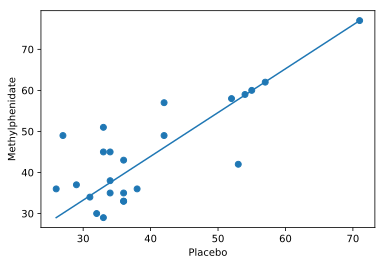

In [3]:
att = np.loadtxt('./ADHD.txt', delimiter=' ', skiprows=1)


plt.scatter(att[:, 0], att[:, 1])
plt.xlabel('Placebo')
plt.ylabel('Methylphenidate')
_ = plt.plot([min(att[:,0]), max(att[:,0])], [min(att[:, 1]), max(att[:, 1])])

## Нормальность дельт

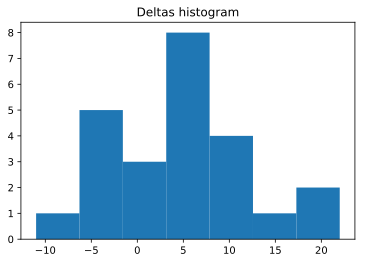

In [10]:
deltas = att[:, 1] - att[:, 0]
plt.hist(deltas, bins =7)
_ = plt.title('Deltas histogram')

In [6]:
st.shapiro(deltas)

(0.9798055291175842, 0.8922544717788696)

## Последовательный анализ Вальда для нормального распределенияи

Рассмотрим, как меняется коридор безразличия при изменении $\alpha$ и $\beta$ (предполагаем, что дисперсия известна, так как иначе это будет t-тест, а не z-тест).

$H_0: \mu \le \mu_L$

$H_1: \mu \ge \mu_U$

### Параметры

- $p_L$ - нижняя граница
- $p_U$ - верхняя граница
- $\alpha$ - уровень значимости, допускаемая вероятность ошибки первого рода: отвергнуть верную $H_0$ (при $p \le p_L$)
- $\beta$ - допускаемая вероятность ошибки второго рода: принять неверную $H_0$ (при $p \ge p_U$)

In [11]:
import sprt as sprt

mean = np.mean(deltas)
var = np.std(deltas, ddof=1)**2

$\alpha=0.05,\ \beta=0.05$

Decision:	Continue

    values   lower    upper
n                          
15    91.0 -64.045  138.420
16    96.0 -61.566  140.900
17    93.0 -59.087  143.379
18   100.0 -56.608  145.858
19    97.0 -54.129  148.337
20   102.0 -51.650  150.816
21   103.0 -49.170  153.295
22   111.0 -46.691  155.775
23   123.0 -44.212  158.254
24   119.0 -41.733  160.733


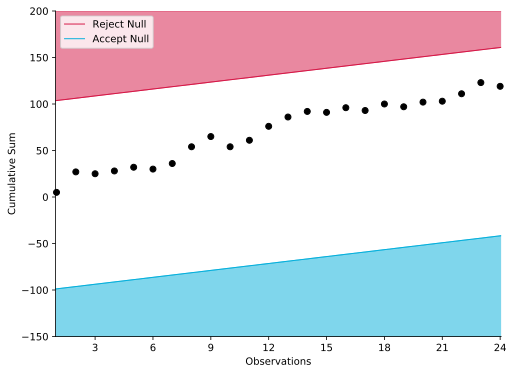

In [12]:
test = sprt.SPRTNormal(alpha=0.05, beta=0.05, h0=mean / 3,  h1=2 * mean / 3, values=deltas, variance=var)
test.plot()

$\alpha=0.15,\ \beta=0.05$

Decision:	Continue

    values   lower    upper
n                          
15    91.0 -60.221  100.649
16    96.0 -57.742  103.128
17    93.0 -55.263  105.607
18   100.0 -52.784  108.087
19    97.0 -50.305  110.566
20   102.0 -47.826  113.045
21   103.0 -45.346  115.524
22   111.0 -42.867  118.003
23   123.0 -40.388  120.482
24   119.0 -37.909  122.962


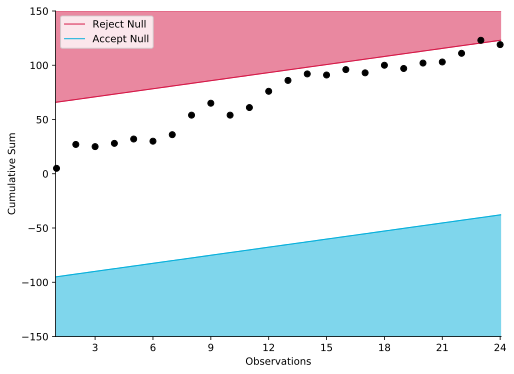

In [13]:
test = sprt.SPRTNormal(alpha=0.15, beta=0.05, h0=mean / 3,  h1=2 * mean / 3, values=deltas, variance=var)
test.plot()

$\alpha=0.05,\ \beta=0.15$

Decision:	Continue

    values   lower    upper
n                          
15    91.0 -26.274  134.596
16    96.0 -23.795  137.076
17    93.0 -21.316  139.555
18   100.0 -18.837  142.034
19    97.0 -16.357  144.513
20   102.0 -13.878  146.992
21   103.0 -11.399  149.471
22   111.0  -8.920  151.951
23   123.0  -6.441  154.430
24   119.0  -3.962  156.909


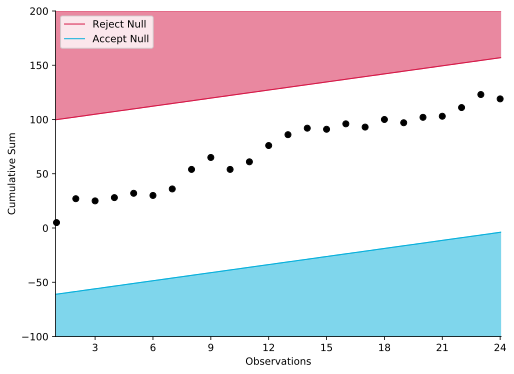

In [14]:
test = sprt.SPRTNormal(alpha=0.05, beta=0.15, h0=mean / 3,  h1=2 * mean / 3, values=deltas, variance=var)
test.plot()

Decision:	Continue

    values   lower    upper
n                          
15    91.0  -0.482   92.120
16    96.0   2.824   95.426
17    93.0   6.130   98.731
18   100.0   9.435  102.037
19    97.0  12.741  105.342
20   102.0  16.046  108.648
21   103.0  19.352  111.954
22   111.0  22.657  115.259
23   123.0  25.963  118.565
24   119.0  29.268  121.870


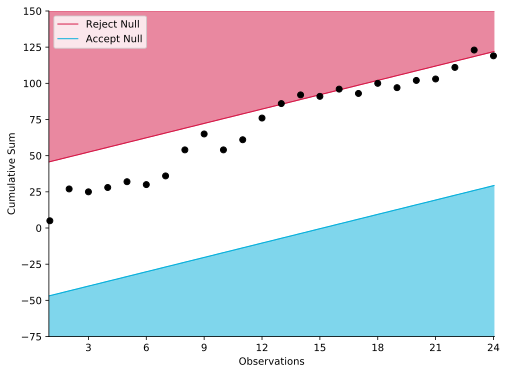

In [15]:
test = sprt.SPRTNormal(alpha=0.08, beta=0.05, h0=mean / 3,  h1=3 * mean / 3, values=deltas, variance=var)
test.plot()